In [ ]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import sys

from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
sepal_length =[]
sepal_width=[]
petal_length=[]
petal_width =[]
classes=[]
namesp = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv('iris.data', names=namesp)
print(dataset.shape)
print(dataset.head(20))

print(dataset.describe())

print(dataset.groupby('class').size())

(150, 5)
    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13         

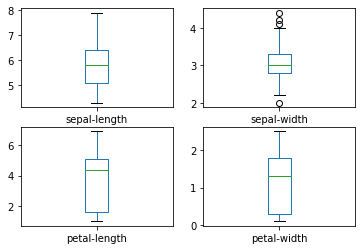

In [ ]:
dataset.plot(kind='box',subplots=True,layout=(2,2))
pyplot.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbad05db7f0>,
      dtype=object)

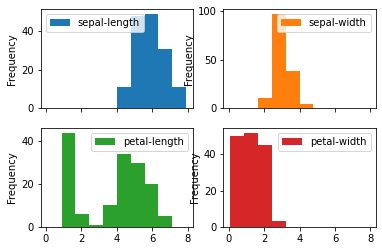

In [ ]:
dataset.plot(kind='hist',subplots=True,layout=(2,2))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbacd0277b8>,
      dtype=object)

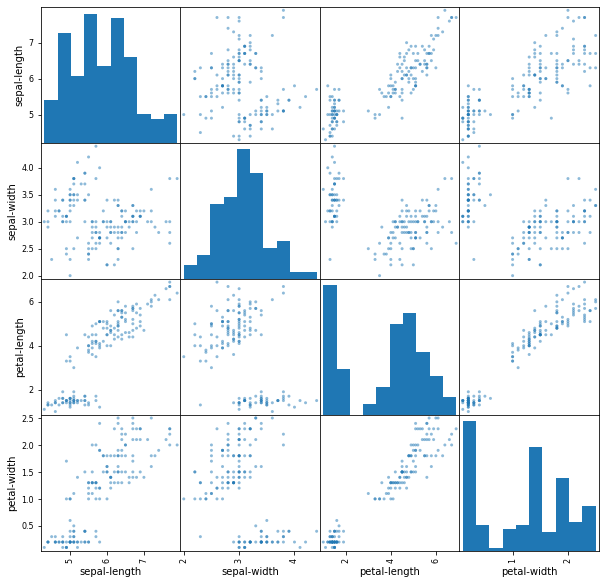

In [ ]:
scatter_matrix(dataset,figsize=(10,10),)

In [ ]:
X = dataset.values[:,0:4]
y = dataset.values[:,4]

In [ ]:
X_train,X_validation,Y_train,Y_validation = train_test_split(X,y,test_size=.20,
                                                             random_state=1)
print(X_train.shape)
print(X_validation.shape)

(120, 4)
(30, 4)


In [ ]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.941667 (0.065085)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.950000 (0.040825)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


Text(0.5, 0, 'Algorithm')

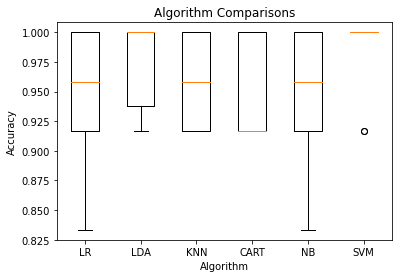

In [ ]:
pyplot.boxplot(results,labels=names)
pyplot.title('Algorithm Comparisons')
pyplot.ylabel('Accuracy')
pyplot.xlabel('Algorithm')

In [ ]:
model = SVC(gamma='auto')
model.fit(X_train,Y_train)
predictions = model.predict(X_validation)


In [ ]:
print(sklearn.metrics.accuracy_score(Y_validation,predictions))
print(confusion_matrix(Y_validation,predictions))
print(classification_report(Y_validation,predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [ ]:
def plot_results(i,j):
  pyplot.scatter(x=X_validation[predictions=='Iris-virginica',i],
               y=X_validation[predictions=='Iris-virginica',j],c='red',label='verginica')
  pyplot.scatter(x=X_validation[predictions=='Iris-versicolor',i],
               y=X_validation[predictions=='Iris-versicolor',j],c='blue',label='versicolor')
  pyplot.scatter(x=X_validation[predictions=='Iris-setosa',i],
               y=X_validation[predictions=='Iris-setosa',j],c='green',label='setosa')
  pyplot.xlabel(namesp[i])
  pyplot.ylabel(namesp[j])
  pyplot.legend()
  pyplot.show()

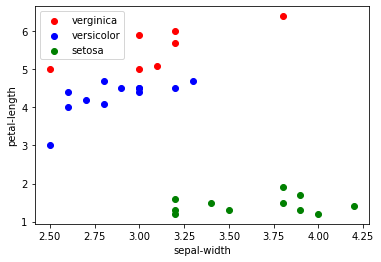

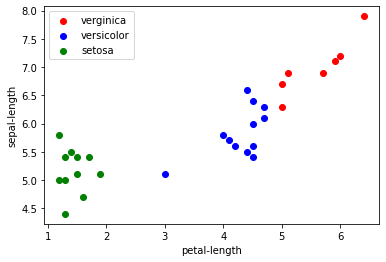

In [ ]:
plot_results(1,2)
plot_results(2,0)